<a href="https://colab.research.google.com/github/marianeneiva/handlingMissingData/blob/main/handlingMissingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#5 ways to handle missing data with Pandas

Null data is often find in datasets due to the lack of response, errors in data collection, among other reasons. 

Althought the presence of non present data (*lol*) is commom, it should be manage to avoid misleading results. Therefore, this CODE highlights four ways you can handle the nulls.


#Downloading data

You can do it manually: https://www.kaggle.com/dansbecker/melbourne-housing-snapshot/home


In [18]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/portfolio_dataScience"

#changing the working directory
%cd /content/gdrive/My Drive/portfolio_dataScience
#Check the present working directory using pwd command

!kaggle datasets download -d dansbecker/melbourne-housing-snapshot
!ls

#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/portfolio_dataScience
  0% 0.00/451k [00:00<?, ?B/s]
100% 451k/451k [00:00<00:00, 27.6MB/s]
kaggle.json  melb_data.csv  melbourne-housing-snapshot.zip
Archive:  melbourne-housing-snapshot.zip
replace melb_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

#Importing data with pandas

In [19]:
import pandas as pd 

data = pd.read_csv('melb_data.csv')

#showing the data
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


# DELETE ROWS WITH NULL VALUES

If you have few instances that contains missing data and the deleting the rows is a possibility.

You can do it following the code bellow:

In [20]:
print('Number of rows of data: ',len(data))
print('Number of nulls values:', data.isna().sum().sum())

dataDeletedNullRows = data.dropna()
print('Number of rows of data after deletion: ', len(dataDeletedNullRows), ' (', len(data) - len(dataDeletedNullRows), ' rows deleted)')
print('Number of nulls values after deletion:', dataDeletedNullRows.isna().sum().sum())



Number of rows of data:  13580
Number of nulls values: 13256
Number of rows of data after deletion:  6196  ( 7384  rows deleted)
Number of nulls values after deletion: 0


#DELETE COLUMNS WITH NULL VALUES

Delete columns if at least 20% of the values are null

In [47]:
print('The percentage of null values in each column:\n')
print(data.isnull().mean()*100)

threshold = len(data) * .80 
dataDeletedNullColumns = data.dropna(thresh=threshold, axis=1)

deleted_columns = list(set(data.columns) - set(dataDeletedNullColumns.columns))
print('\nDeleted columns: ' + str(deleted_columns))

The percentage of null values in each column:

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.000000
Postcode          0.000000
Bedroom2          0.000000
Bathroom          0.000000
Car               0.456554
Landsize          0.000000
BuildingArea     47.496318
YearBuilt        39.580265
CouncilArea      10.081001
Lattitude         0.000000
Longtitude        0.000000
Regionname        0.000000
Propertycount     0.000000
dtype: float64

Deleted columns: ['BuildingArea', 'YearBuilt']


#REPLACE VALUES BY MEAN/MEDIAN...



       Car  BuildingArea    YearBuilt CouncilArea
0      1.0     151.96765  1964.684217       Yarra
1      0.0      79.00000  1900.000000       Yarra
2      0.0     150.00000  1900.000000       Yarra
3      1.0     151.96765  1964.684217       Yarra
4      2.0     142.00000  2014.000000       Yarra
...    ...           ...          ...         ...
13575  2.0     151.96765  1981.000000         NaN
13576  2.0     133.00000  1995.000000         NaN
13577  4.0     151.96765  1997.000000         NaN
13578  5.0     157.00000  1920.000000         NaN
13579  1.0     112.00000  1920.000000         NaN

[13580 rows x 4 columns]
       Car  BuildingArea  YearBuilt CouncilArea
0      1.0         126.0     1970.0       Yarra
1      0.0          79.0     1900.0       Yarra
2      0.0         150.0     1900.0       Yarra
3      1.0         126.0     1970.0       Yarra
4      2.0         142.0     2014.0       Yarra
...    ...           ...        ...         ...
13575  2.0         126.0     1981.0   

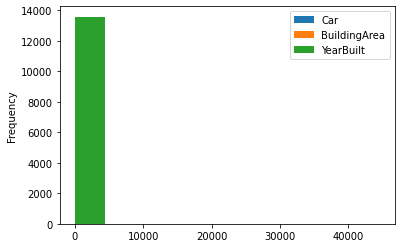

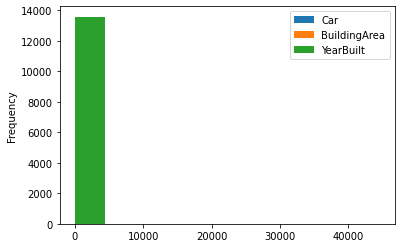

In [62]:
import seaborn as sns
dataNull = data[data.columns[data.isnull().mean() > 0]]

dataMean = dataNull.fillna(dataNull.mean())
print(dataMean)
ax = dataMean.plot.hist()

dataMedian = dataNull.fillna(dataNull.median())
print(dataMedian)
bx = dataMedian.plot.hist()



#CREATE A FAKE CATEGORY

From the results above, you can see that column **CouncilArea** still have null values. This is why the atribute is not numeric. In this case, you can create a fake category to replace the blank values. 

The approach is too risky. You do not really solve the problem, you just replace one value (null) by another (UNKOWN). 

In [63]:
dataMedian['CouncilArea'] = dataMedian['CouncilArea'].fillna('UNKNOWN')
print(dataMedian)

       Car  BuildingArea  YearBuilt CouncilArea
0      1.0         126.0     1970.0       Yarra
1      0.0          79.0     1900.0       Yarra
2      0.0         150.0     1900.0       Yarra
3      1.0         126.0     1970.0       Yarra
4      2.0         142.0     2014.0       Yarra
...    ...           ...        ...         ...
13575  2.0         126.0     1981.0     UNKNOWN
13576  2.0         133.0     1995.0     UNKNOWN
13577  4.0         126.0     1997.0     UNKNOWN
13578  5.0         157.0     1920.0     UNKNOWN
13579  1.0         112.0     1920.0     UNKNOWN

[13580 rows x 4 columns]
